In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import keras
import re 

In [2]:
df = pd.read_csv('priceHikeComments.csv')

# 1. Remove duplicates and Null values

In [3]:
df.head()

,statement,polarity,aspect,source
0,চালের দাম বাড়ায় ঠিকমতো খেতে পারছি না,negative,commodities,youtube
1,জিনিসপত্রের দাম আকাশচুম্বী,negative,commodities,youtube
2,বাজারে প্রতিটা জিনিসের দাম বেড়েছে,negative,commodities,NaN
3,বাসের ভাড়া বাড়ায় রাস্তায় বের হতে পারছি না,negative,transportation,NaN
4,যেভাবে দাম বাড়ছে দুদিন পর বাসে না উঠে হেটে হেট...,negative,transportation,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  5208 non-null   object
 1   polarity   5208 non-null   object
 2   aspect     5208 non-null   object
 3   source     37 non-null     object
dtypes: object(4)
memory usage: 162.9+ KB


In [5]:
df.isnull().sum()

statement       0
polarity        0
aspect          0
source       5171
dtype: int64

In [6]:
# Removing Source Column
df.drop(columns=['source'],inplace=True)

In [7]:
print(f'Duplicated values are: {df.duplicated().sum()}')

Duplicated values are: 59


In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.shape

(5149, 3)

# 2. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [10]:
import string
from nltk.corpus import stopwords
import nltk

from bltk.langtools.banglachars import punctuations

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')


'danc'

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
textFile = pd.read_table('stopwordsBN.txt')
stopwordsBangla = []
for line in textFile['statement']:
    stopwordsBangla.append(line)

In [14]:
def transforming_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        i = ps.stem(i)
        y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in punctuations and i not in stopwordsBangla:
            y.append(i)
    return ' '.join(y)

In [15]:
transforming_text('আমাদের দেশে হবে সেই ছেলে ,!? কবে কথাই না বড় হয়ে কাজে বড় হবে !!!?')

'দেশে ছেলে কথাই বড় হয়ে বড়'

In [16]:
#df['polarity'] = df['polarity'].apply(transforming_text)
df['Nstatement'] = df['statement'].apply(transforming_text)

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Npolarity'] = label_encoder.fit_transform(df['polarity'])
df['Naspect'] = label_encoder.fit_transform(df['aspect'])

In [18]:
x = df['statement']
y = df['Npolarity']
y2 = df['Naspect']

In [19]:
#for i in range(100):
#    print(df['Npolarity'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20)
X2_train, X2_test, y2_train, y2_test = train_test_split(x,y2,test_size=.20)

In [21]:
print("shape of XTrain: ",X_train.shape)
print("shape of XTest: ",X_test.shape)
print("shape of yTrain: ",y_train.shape)
print("shape of yTest: ",y_test.shape)


shape of XTrain:  (4119,)
shape of XTest:  (1030,)
shape of yTrain:  (4119,)
shape of yTest:  (1030,)


In [22]:
#print(X_train[10])
#print(y_train[40])

# 3. EDA (Exploratory Data Analysis)

In [23]:
from matplotlib import pyplot as plt

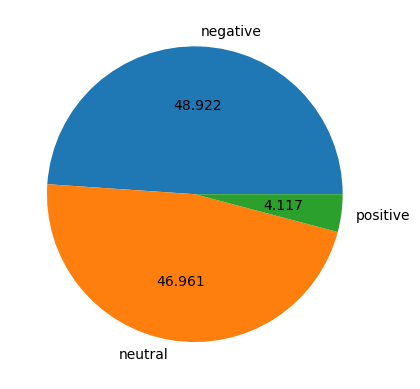

In [24]:
# plt.pie(df['polarity'].value_counts(),labels=['1','2','3'],autopct='%0.2f')
plt.pie(df['polarity'].value_counts(),labels=['negative','neutral','positive'],autopct='%0.3f')
plt.show()

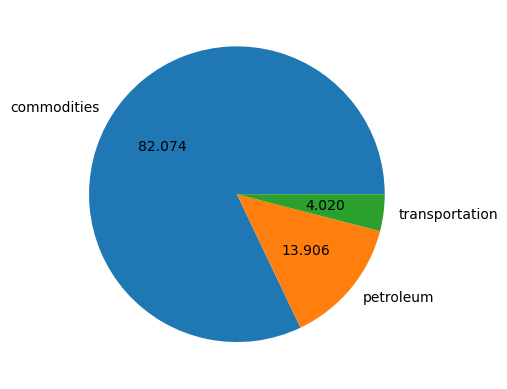

In [25]:
# plt.pie(df['polarity'].value_counts(),labels=['1','2','3'],autopct='%0.2f')
plt.pie(df['aspect'].value_counts(),labels=['commodities','petroleum','transportation'],autopct='%0.3f')
plt.show()

In [26]:
from wordcloud import WordCloud
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white',font_path="kalpurush.ttf",regexp=regex)

In [27]:
df.head()

,statement,polarity,aspect,Nstatement,Npolarity,Naspect
0,চালের দাম বাড়ায় ঠিকমতো খেতে পারছি না,negative,commodities,চালের দাম বাড়ায় ঠিকমতো খেতে পারছি,0,0
1,জিনিসপত্রের দাম আকাশচুম্বী,negative,commodities,জিনিসপত্রের দাম আকাশচুম্বী,0,0
2,বাজারে প্রতিটা জিনিসের দাম বেড়েছে,negative,commodities,বাজারে প্রতিটা জিনিসের দাম বেড়েছে,0,0
3,বাসের ভাড়া বাড়ায় রাস্তায় বের হতে পারছি না,negative,transportation,বাসের ভাড়া বাড়ায় রাস্তায় বের পারছি,0,2
4,যেভাবে দাম বাড়ছে দুদিন পর বাসে না উঠে হেটে হেট...,negative,transportation,যেভাবে দাম বাড়ছে দুদিন বাসে উঠে হেটে হেটে যাত্...,0,2


In [28]:
#df[df['polarity'] == 'negative']['statement'].str.cat(sep=" ")

In [29]:
negative_wc = wc.generate(df[df['polarity'] == 'negative']['statement'].str.cat(sep=" "))

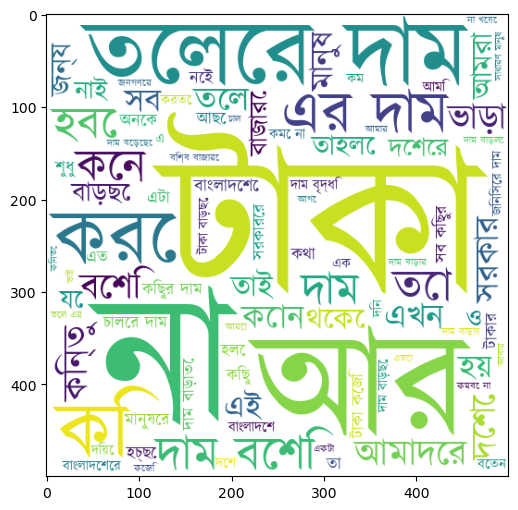

In [30]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [31]:
positive_wc = wc.generate(df[df['polarity'] == 'positive']['statement'].str.cat(sep=" "))

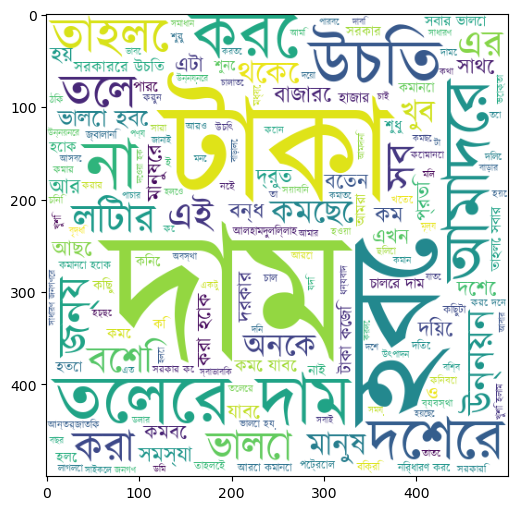

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [33]:
neutral_wc = wc.generate(df[df['polarity'] == 'neutral']['statement'].str.cat(sep=" "))

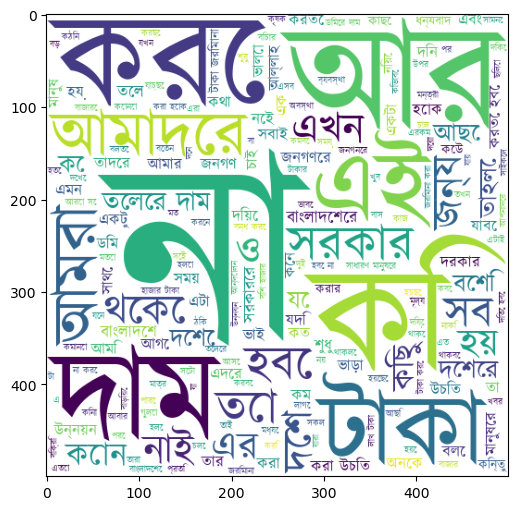

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(neutral_wc)

In [35]:
commodities_wc = wc.generate(df[df['aspect'] == 'commodities']['statement'].str.cat(sep=" "))

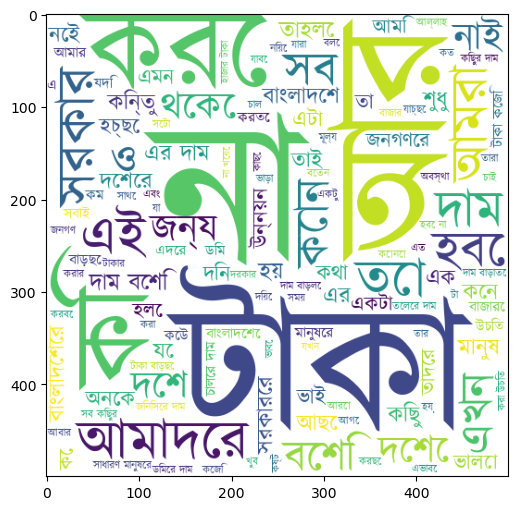

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(commodities_wc)

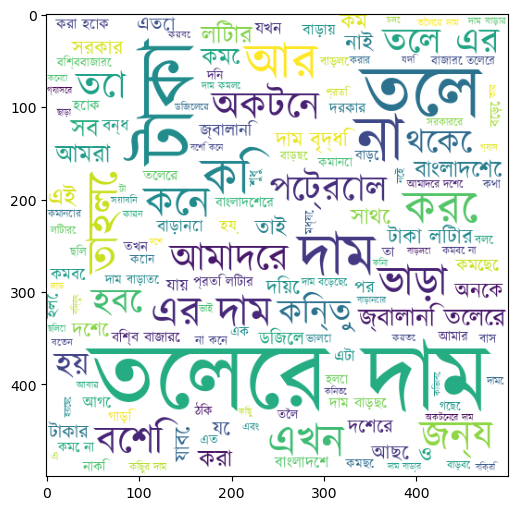

In [37]:
petroleum_wc = wc.generate(df[df['aspect'] == 'petroleum']['statement'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(petroleum_wc)

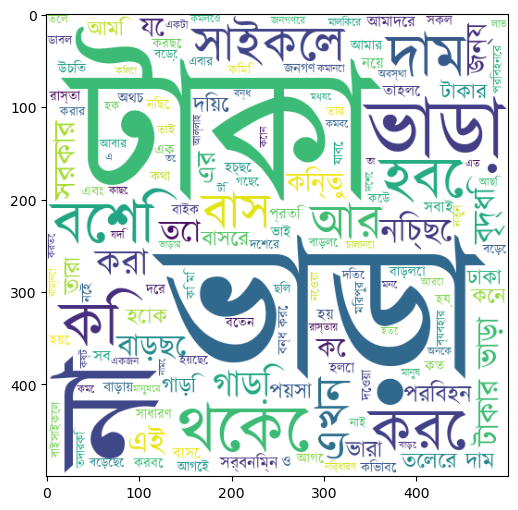

In [38]:
transportation_wc = wc.generate(df[df['aspect'] == 'transportation']['statement'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(transportation_wc)

# 4. Model Building for sentiment

In [39]:
# word to index uising tokenizer

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000,lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1 

#for 2nd part
tokenizer = Tokenizer(num_words=1000,lower=True)
tokenizer.fit_on_texts(X2_train)

X2_train = tokenizer.texts_to_sequences(X2_train)
X2_test = tokenizer.texts_to_sequences(X2_test)


In [40]:
print("Frequency of a word in a sentence: ",X_train[6])

Frequency of a word in a sentence:  [394, 141, 380, 1, 39, 7, 446]


In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxLen = 20

X_train = pad_sequences(X_train, padding= 'post', maxlen = maxLen)
X_test = pad_sequences(X_test, padding= 'post', maxlen = maxLen)

print(X_train[3,:])


X2_train = pad_sequences(X2_train, padding= 'post', maxlen = maxLen)
X2_test = pad_sequences(X2_test, padding= 'post', maxlen = maxLen)

[ 12  21   1 300  11  33   1  92   2   0   0   0   0   0   0   0   0   0
   0   0]


In [42]:
from keras.utils import to_categorical
num_classes = 3

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)


(4119, 3)


In [43]:
num_classes = 3
y2_train = to_categorical(y2_train, num_classes)
y2_test = to_categorical(y2_test, num_classes)
print(y2_train.shape)

(4119, 3)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,SimpleRNN
from keras import optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
#import numpy as np

#(samples, timesteps, features)
#(batch_size, timesteps, input_dim)
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)  #(750, 100, 1)

X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(4119, 20, 1)
(1030, 20, 1)


In [45]:
num_classes=3


def vanilla_rnn():
    model = Sequential()
    #model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
    model.add(SimpleRNN(50, input_shape = (maxLen,1), return_sequences = False))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [46]:
#sentiment checking
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50)
model.fit(X_train, y_train)

C:\Users\sahir\AppData\Local\Temp\ipykernel_2316\2779540983.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


C:\Users\sahir\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
83/83 [==============================] - 3s 4ms/step - loss: 0.8569 - accuracy: 0.5035
Epoch 2/200
83/83 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5504
Epoch 3/200
83/83 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.5628
Epoch 4/200
83/83 [==============================] - 0s 3ms/step - loss: 0.8149 - accuracy: 0.5691
Epoch 5/200
83/83 [==============================] - 0s 4ms/step - loss: 0.8088 - accuracy: 0.5761
Epoch 6/200
83/83 [==============================] - 0s 4ms/step - loss: 0.8032 - accuracy: 0.5878
Epoch 7/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7978 - accuracy: 0.5885
Epoch 8/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7936 - accuracy: 0.5882
Epoch 9/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7893 - accuracy: 0.5936
Epoch 10/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7841 - accuracy: 0.5975
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.6567
Epoch 84/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.6344
Epoch 85/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.6429
Epoch 86/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.6635
Epoch 87/200
83/83 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.6662
Epoch 88/200
83/83 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.6621
Epoch 89/200
83/83 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.6553
Epoch 90/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7119 - accuracy: 0.6514
Epoch 91/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.6601
Epoch 92/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.6579
Epoch 93/200


83/83 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6973
Epoch 165/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6817
Epoch 166/200
83/83 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6868
Epoch 167/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6941
Epoch 168/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.6963
Epoch 169/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6905
Epoch 170/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.6970
Epoch 171/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.6956
Epoch 172/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.6982
Epoch 173/200
83/83 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6943
Epoc

# 5. Model Building for Chategories  

In [47]:
X2_train = np.array(X2_train).reshape((X2_train.shape[0], X2_train.shape[1], 1))
print(X2_train.shape)  #(750, 100, 1)

X2_test = np.array(X2_test).reshape((X2_test.shape[0], X2_test.shape[1], 1))
print(X2_test.shape)

(4119, 20, 1)
(1030, 20, 1)


In [48]:
num_classes=3


def vanilla_rnn():
    model2 = Sequential()
    #model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
    model2.add(SimpleRNN(50, input_shape = (maxLen,1), return_sequences = False))
    model2.add(Dense(num_classes))
    model2.add(Activation('softmax'))
    model2.summary()
    
    adam = optimizers.Adam(lr = 0.001)
    model2.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model2

In [49]:
from keras.wrappers.scikit_learn import KerasClassifier

model2 = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50)
model2.fit(X2_train, y2_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


C:\Users\sahir\AppData\Local\Temp\ipykernel_2316\3940488574.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50)


83/83 [==============================] - 1s 4ms/step - loss: 0.5885 - accuracy: 0.8099
Epoch 2/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.8213
Epoch 3/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.8216
Epoch 4/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.8216
Epoch 5/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.8216
Epoch 6/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.8216
Epoch 7/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.8216
Epoch 8/200
83/83 [==============================] - 0s 5ms/step - loss: 0.5547 - accuracy: 0.8216
Epoch 9/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.8216
Epoch 10/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.8216
Epoch 11/200
83/83 [=

83/83 [==============================] - 0s 4ms/step - loss: 0.5289 - accuracy: 0.8245
Epoch 84/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.8237
Epoch 85/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.8237
Epoch 86/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.8254
Epoch 87/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.8245
Epoch 88/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.8269
Epoch 89/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5220 - accuracy: 0.8259
Epoch 90/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.8250
Epoch 91/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.8250
Epoch 92/200
83/83 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.8252
Epoch 93/200


83/83 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8420
Epoch 165/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.8398
Epoch 166/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.8437
Epoch 167/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8410
Epoch 168/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4522 - accuracy: 0.8407
Epoch 169/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.8393
Epoch 170/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.8405
Epoch 171/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.8386
Epoch 172/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8422
Epoch 173/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8373
Epoc

In [50]:
'''
a= ['আছি আছি হ্যা হ্যা']
#a = ["I love their service"]
a = tokenizer.texts_to_sequences(a)
a=np.array(a)
a = pad_sequences(a, padding='post', maxlen=maxLen)

a = a.reshape((a.shape[0], a.shape[1], 1))
#print(a.shape)

prediction = model.predict(np.array(a))
print(prediction) # 0 means negative and 1 means positive
'''

'\na= [\'আছি আছি হ্যা হ্যা\']\n#a = ["I love their service"]\na = tokenizer.texts_to_sequences(a)\na=np.array(a)\na = pad_sequences(a, padding=\'post\', maxlen=maxLen)\n\na = a.reshape((a.shape[0], a.shape[1], 1))\n#print(a.shape)\n\nprediction = model.predict(np.array(a))\nprint(prediction) # 0 means negative and 1 means positive\n'

In [51]:

label_encoder = preprocessing.LabelEncoder()
df['Npolarity'] = label_encoder.fit_transform(df['polarity'])

In [52]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(df['statement']).toarray()

In [53]:
xTrain,xTest,yTrain,yTest = train_test_split(X,df['Npolarity'],test_size = 0.10, random_state=42)

In [54]:
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(xTrain.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(xTrain, yTrain, epochs=2, batch_size=10)
# evaluate the ker

Epoch 1/2
464/464 [==============================] - 2s 2ms/step - loss: 1.0903 - accuracy: 0.5952
Epoch 2/2
464/464 [==============================] - 1s 2ms/step - loss: 0.6500 - accuracy: 0.7290


In [55]:
text= "তেলের দাম কমে গিয়েছে, আমরা সবাই খুব খুশি"
text=transforming_text(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
#print(a)
label_encoder.inverse_transform(a)[0]

if a==0:
    print("Negative")
elif a==1:
    print("Neutral")
else:
    print("Positive")

1/1 [==============================] - 0s 101ms/step
Negative
